In [53]:
import time

import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
from window import WindowGenerator
import utils

# Autoregressive (AR) LSTM

## Dataset

Removed inlet and outlet fan speed due to the fact that auto-regression requires all features as inputs and outputs to predict.

In [54]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)

In [55]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = None # all columns
feature_count = len(case_1.columns)

In [56]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Model creation

In [57]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
# features_size = len(label_columns)

In [58]:
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [59]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

In [60]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [61]:
exec_times = {}

In [62]:
results = {}

## Case 2

In [63]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_2'] = time.time() - start_t

2022-10-10 16:12:31.236816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-10 16:12:35.642554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [64]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_1 (LSTMCell)      multiple                  38784     
                                                                 
 rnn_1 (RNN)                 multiple                  38784     
                                                                 
 dense_1 (Dense)             multiple                  8910      
                                                                 
Total params: 47,694
Trainable params: 47,694
Non-trainable params: 0
_________________________________________________________________


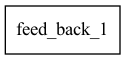

In [65]:
tf.keras.utils.plot_model(feedback_model, "../plots/models/feedback_model.png", show_shapes=True)

2022-10-10 16:13:06.686597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


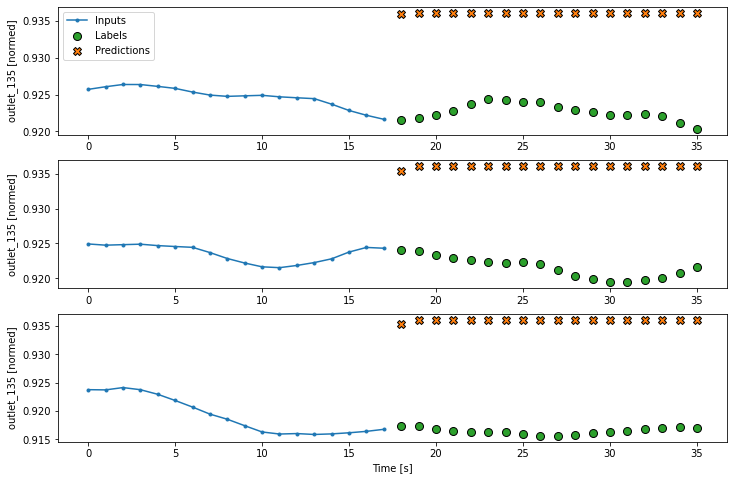

In [66]:
window.plot(feedback_model, plot_col="outlet_135")

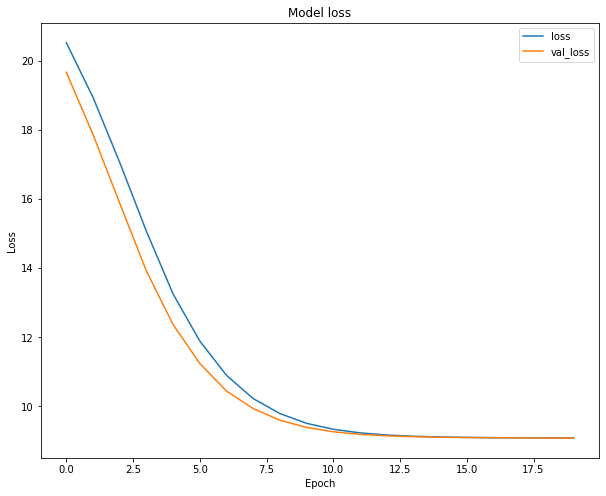

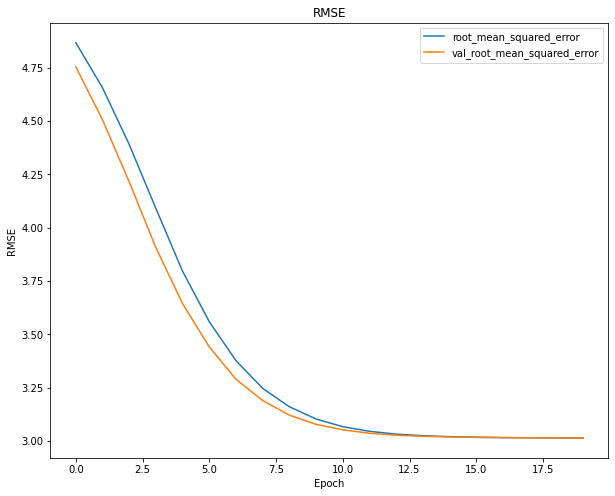

In [67]:
utils.plot_losses(history=history)

In [68]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [69]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_3'] = time.time() - start_t

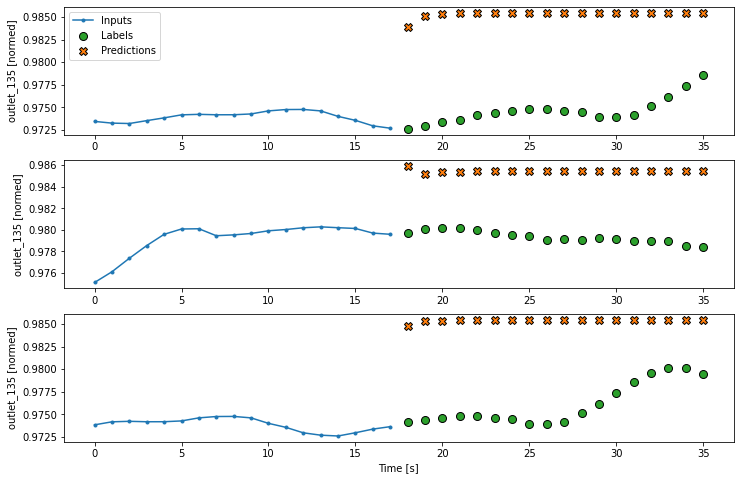

In [70]:
window.plot(feedback_model, plot_col="outlet_135")

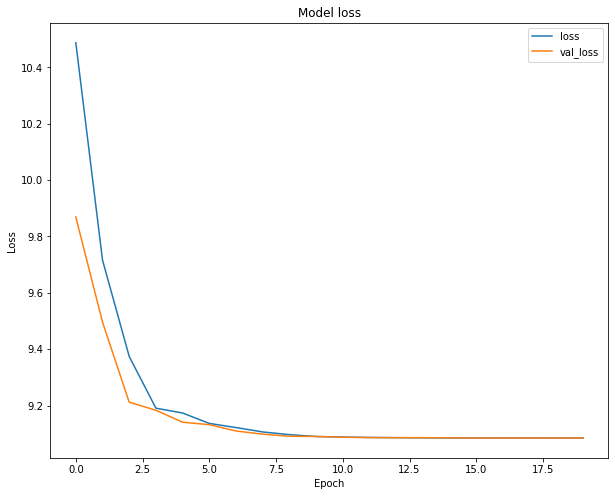

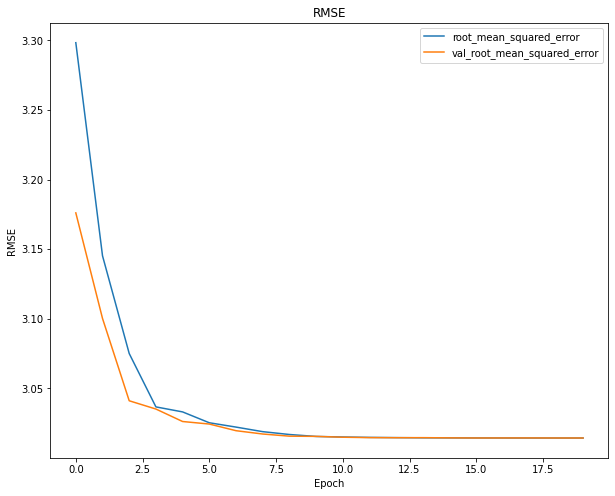

In [71]:
utils.plot_losses(history=history)

In [72]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [73]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_4'] = time.time() - start_t

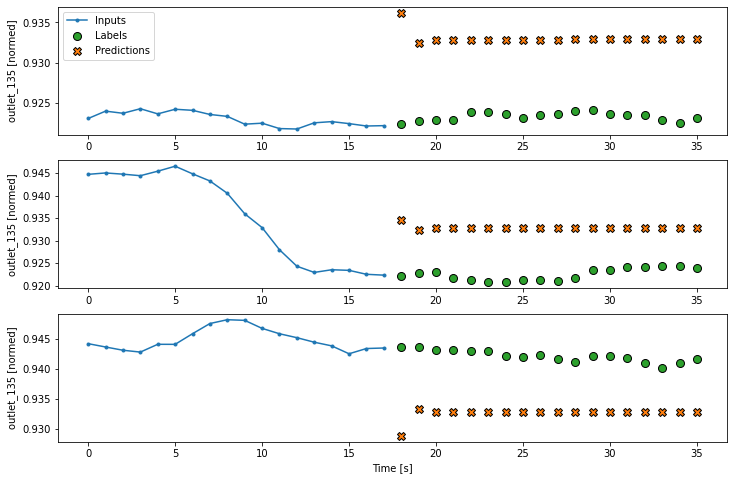

In [74]:
window.plot(feedback_model, plot_col="outlet_135")

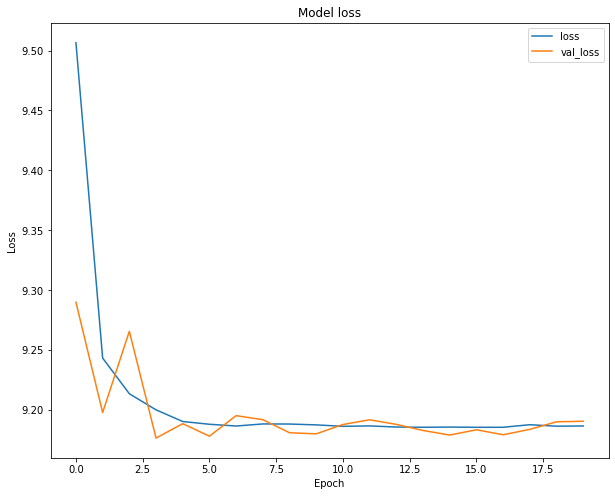

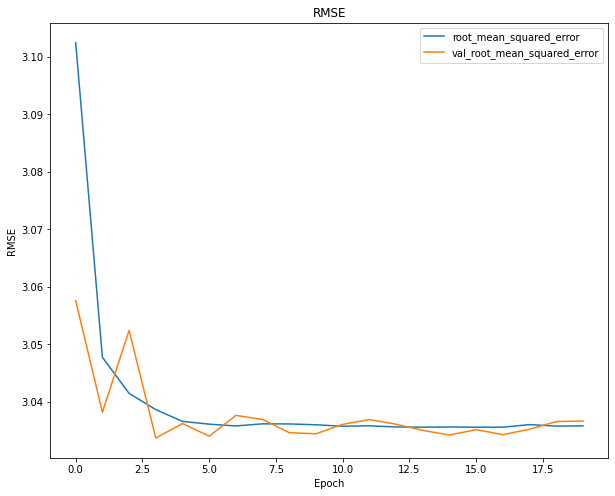

In [75]:
utils.plot_losses(history=history)

In [76]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [77]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

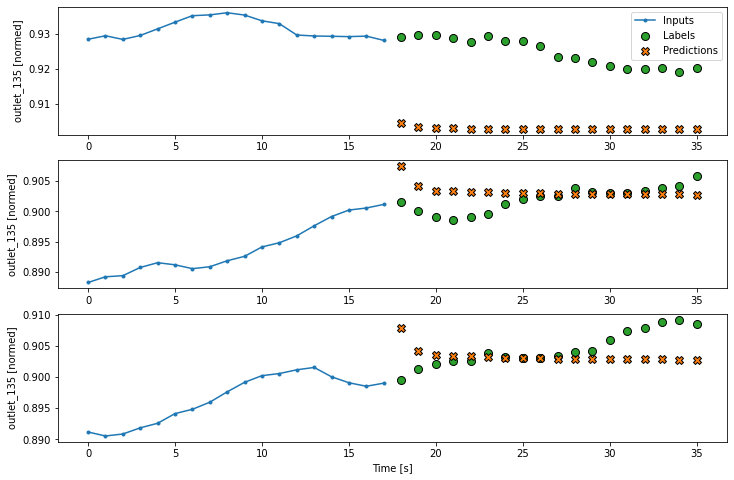

In [78]:
window.plot(feedback_model, plot_col="outlet_135")

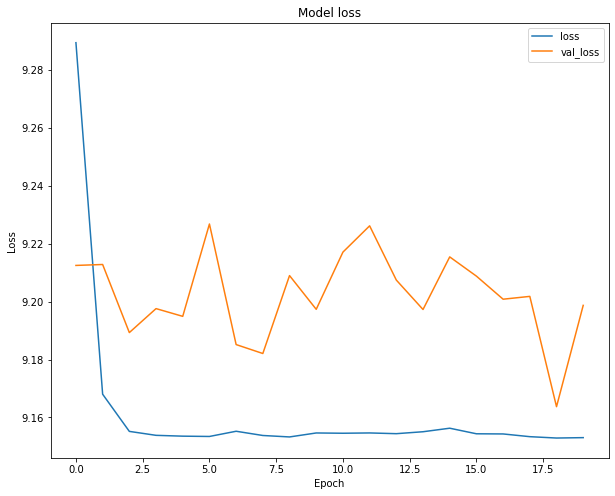

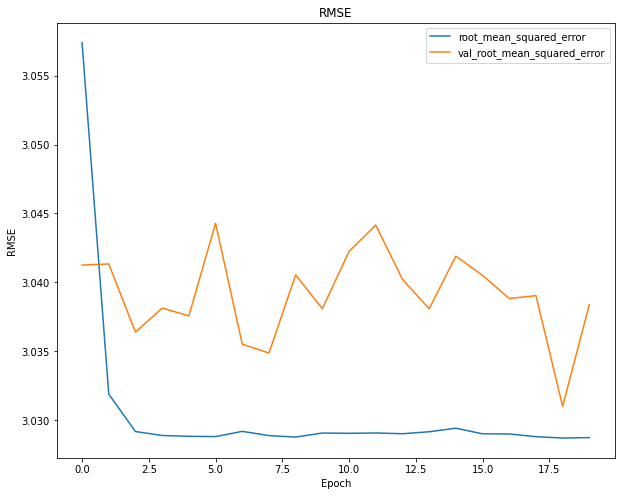

In [79]:
utils.plot_losses(history=history)

In [80]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [81]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    # label_columns=label_columns
)

test_res = feedback_model.evaluate(window.train) # Testing

5/5 [==============================] - 1s 108ms/step - loss: 0.0320 - root_mean_squared_error: 0.2022


In [82]:
results['test'] = {
    'loss': utils.inverse_transform_loss(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

In [83]:
pd.DataFrame(results).transpose().round(4)

,loss,rmse,val_loss,val_rmse
case_2,9.0870,3.0148,9.0862,3.0146
case_3,9.0850,3.0144,9.0851,3.0144
case_4,9.1867,3.0359,9.1906,3.0367
case_5,9.1530,3.0288,9.1987,3.0384
test,9.8492,3.1723,NaN,NaN


In [84]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,38.52
case_3,44.30
case_4,74.53
case_5,155.33


In [85]:
print("Total training time: %.2fs" % exec_times_df['Time'].sum())

Total training time: 312.69s
